<a href="https://colab.research.google.com/github/MadmanMarble/Planet_U-NET/blob/main/Planet_image_stacking_032024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("devtools")

devtools:::install_github("gearslaboratory/gdalUtils")
install.packages("dplyr")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘sp’, ‘Rcpp’, ‘terra’, ‘classInt’, ‘s2’, ‘units’, ‘wk’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





R.methodsS3 (NA -> 1.8.2 ) [CRAN]
R.oo        (NA -> 1.26.0) [CRAN]
iterators   (NA -> 1.0.14) [CRAN]
R.utils     (NA -> 2.12.3) [CRAN]
foreach     (NA -> 1.5.2 ) [CRAN]


Skipping 1 packages not available: rgdal

Installing 6 packages: R.methodsS3, R.oo, iterators, rgdal, R.utils, foreach

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpX8ewoo/remotes164b413509d0/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmpX8ewoo/file164b7b9a9a23/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)
# library(gdalUtils)

drive_auth(use_oob = TRUE, cache = FALSE)

Loading required package: sp

Linking to GEOS 3.11.1, GDAL 3.6.4, PROJ 9.1.1; sf_use_s2() is TRUE


Attaching package: ‘fasterize’


The following object is masked from ‘package:graphics’:

    plot


The following object is masked from ‘package:base’:

    plot



Attaching package: ‘magrittr’


The following object is masked from ‘package:raster’:

    extract



Attaching package: ‘data.table’


The following object is masked from ‘package:raster’:

    shift



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:raster’:

    intersect, select, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.app

Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIRGp6a0NZNThURkJSTnlQc3FQbW43TF9CSjQtMzdkbGM2TnYwUThRR1Q5d2lTeFdGLWhLWDcydm5nODM1NDd1USIsInN0YXRlIjoiNDQ1MWUwMTA1YmJlMDIyYTZiZDRjNzg5MzIzNzAzMGIifQ==


In [3]:
dir.create("/content/imagery")
dir.create("/content/imagery/planet")
dir.create("/content/imagery/planet/dem")
dir.create("/content/imagery/planet/dem/utm4")
dir.create("/content/imagery/planet/dem/utm5")

In [4]:
dir.create("/content/imagery/planet/2018")
dir.create("/content/imagery/planet/2018/utm4")
dir.create("/content/imagery/planet/2018/utm5")

dir.create("/content/imagery/planet/2019")
dir.create("/content/imagery/planet/2019/utm4")
dir.create("/content/imagery/planet/2019/utm5")

dir.create("/content/imagery/planet/2020")
dir.create("/content/imagery/planet/2020/utm4")
dir.create("/content/imagery/planet/2020/utm5")

In [ ]:
# # https://drive.google.com/drive/folders/1DRk7b6lKEtihFlg3XXXwmePwNlFIKlA7?usp=drive_link
# # planet utm5 DEM

# folder = "1DRk7b6lKEtihFlg3XXXwmePwNlFIKlA7"
# folder_id = drive_get(as_id(folder))

# files = drive_ls(folder_id)

# for (i in seq_along(files$name)) {
#   i_dir <- files[i, ] # Select directory
#     try({

#       # Download files from the directory to the specified path
#       drive_download(
#         as_id(i_dir$id[1]),
#         path = paste0('/content/imagery/planet/dem/utm5/', i_dir$name[1])
#       )
#     })
#   }

In [ ]:
# # https://drive.google.com/drive/folders/1P4-Y7sSdQiIDWda19uTHX0KaYsULcDUI?usp=drive_link
# # planet utm5 2020

# folder = "1P4-Y7sSdQiIDWda19uTHX0KaYsULcDUI"
# folder_id = drive_get(as_id(folder))

# files = drive_ls(folder_id)

# for (i in seq_along(files$name)) {
#   i_dir <- files[i, ] # Select directory
#     try({

#       # Download files from the directory to the specified path
#       drive_download(
#         as_id(i_dir$id[1]),
#         path = paste0('/content/imagery/planet/2020/utm5/', i_dir$name[1])
#       )
#     })
#   }

In [ ]:
# # https://drive.google.com/drive/folders/1P6pqHrshe3k6kEvQpfRyPAgfAFQLUoeS?usp=drive_link
# # planet utm5 2019

# folder = "1P6pqHrshe3k6kEvQpfRyPAgfAFQLUoeS"
# folder_id = drive_get(as_id(folder))

# files = drive_ls(folder_id)

# for (i in seq_along(files$name)) {
#   i_dir <- files[i, ] # Select directory
#     try({

#       # Download files from the directory to the specified path
#       drive_download(
#         as_id(i_dir$id[1]),
#         path = paste0('/content/imagery/planet/2019/utm5/', i_dir$name[1])
#       )
#     })
#   }

In [5]:
dir.create("/content/workingfolder")
dir.create("/content/workingfolder/nwi_utm4")
dir.create("/content/workingfolder/nwi_utm5")

dir.create("/content/workingfolder/aoi")
dir.create("/content/workingfolder/aoi/utm4")
dir.create("/content/workingfolder/aoi/utm5")

dir.create("/content/workingfolder/dem")
dir.create("/content/workingfolder/dem/utm4")
dir.create("/content/workingfolder/dem/utm5")

dir.create("/content/workingfolder/ccap")
dir.create("/content/workingfolder/ccap/utm4")
dir.create("/content/workingfolder/ccap/utm5")

dir.create("/content/workingfolder/nlcd")
dir.create("/content/workingfolder/nlcd/utm4")
dir.create("/content/workingfolder/nlcd/utm5")




In [ ]:
# # folder for another elevation model.
# dir.create("/content/folder")
# dir.create("/content/folder/new_elevation")

In [ ]:
# #
# # https://drive.google.com/file/d/1YVeXmyBKJdxvY1-msKWw1zSEtsqHYhft/view?usp=drive_link
# drive_download(file = as_id('1YVeXmyBKJdxvY1-msKWw1zSEtsqHYhft'), path =  '/content/folder/new_elevation/hi_dem.tif', overwrite = FALSE)


File downloaded:

• hawaii_10m.tif <id: 1YVeXmyBKJdxvY1-msKWw1zSEtsqHYhft>

Saved locally as:

• /content/folder/new_elevation/hi_dem.tif



In [7]:
cl <- makeCluster(8)
########################################################################## load NWI data

# load NUMERIC nwi data
# https://drive.google.com/file/d/1NHOKJKTqlNeuDg4DlfYfM3evDTvp0q8S/view?usp=drive_link
# This file is the national wetland inventory vector file (for utm 4 islands = Kauai, Oahu, Molokai, Maui) that includes a column called wetland_ty_numeric numbered 1 - 7 for the 7 differenet wetland categories.
drive_download(file = as_id('1NHOKJKTqlNeuDg4DlfYfM3evDTvp0q8S'), path =  '/content/workingfolder/nwi_utm4/nwi_utm4.gpkg', overwrite = FALSE)

# https://drive.google.com/file/d/1vjY2D7TCsFj5Mcs3Wk5Gh0OV3MIPD_M4/view?usp=drive_link
# This file is the national wetland inventory vector file (for utm 5 island = Hawaii)that includes a column called wetland_ty_numeric numbered 1 - 7 for the 7 differenet wetland categories.
drive_download(file = as_id('1vjY2D7TCsFj5Mcs3Wk5Gh0OV3MIPD_M4'), path =  '/content/workingfolder/nwi_utm5/nwi_utm5.gpkg', overwrite = FALSE)




########################################################################## load AOI data

# https://drive.google.com/file/d/1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH/view?usp=drive_link
# This file is the area of interest vector file (for utm 4 islands = Kauai, Oahu, Molokai, Maui) that outlines which areas of interest to clip data to.
drive_download(file = as_id("1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH"),
path = "/content/workingfolder/aoi/utm4/aoi_utm4.gpkg", overwrite = FALSE)

# https://drive.google.com/file/d/1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc/view?usp=drive_link
# This file is the area of interest vector file (for utm 5 island = Hawaii) that outlines which areas of interest to clip data to.
drive_download(file = as_id("1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc"),
path = "/content/workingfolder/aoi/utm5/aoi_utm5.gpkg", overwrite = FALSE)




########################################################################## load DEM data

# load the dem (for utm 4 islands = Kauai, Oahu, Molokai, Maui) it also will load the Hawaii dem
# https://drive.google.com/drive/folders/1URF4YPEnWirmyWjmueyIgiYchcORWe6q?usp=drive_link
jp_folder = "1URF4YPEnWirmyWjmueyIgiYchcORWe6q"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/dem/utm4/', i_dir$name[1])
      )
    })
  }




########################################################################## load CCAP data

# load the ccap (for utm 4 islands = Kauai, Oahu, Molokai, Maui)
# https://drive.google.com/drive/folders/14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv?usp=drive_link
jp_folder = "14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/ccap/utm4/', i_dir$name[1])
      )
    })
  }







# ########################################################################## load NLCD data

# # load the nlcd, utm 4 (for utm 4 islands = Kauai, Oahu, Molokai, Maui)
# # https://drive.google.com/file/d/17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC/view?usp=drive_link
# drive_download(file = as_id('17tWhnoFP-VTrobjaMuTLwdLU15v7C0NC'), path =  '/content/workingfolder/nlcd/utm4/nlcd_utm4.tif', overwrite = FALSE)

# # load the nlcd, utm 5 (for utm 5 island = Hawaii)
# # https://drive.google.com/file/d/1mn_Q1q7HRA3Yh7oBS1KmBriUEtLVWovr/view?usp=drive_link
# drive_download(file = as_id('1mn_Q1q7HRA3Yh7oBS1KmBriUEtLVWovr'), path =  '/content/workingfolder/nlcd/utm5/nlcd_utm5.tif', overwrite = FALSE)

stopCluster(cl)

File downloaded:

• nwi_utm4_numeric.gpkg <id: 1NHOKJKTqlNeuDg4DlfYfM3evDTvp0q8S>

Saved locally as:

• /content/workingfolder/nwi_utm4/nwi_utm4.gpkg

File downloaded:

• nwi_utm5_numeric.gpkg <id: 1vjY2D7TCsFj5Mcs3Wk5Gh0OV3MIPD_M4>

Saved locally as:

• /content/workingfolder/nwi_utm5/nwi_utm5.gpkg

File downloaded:

• aoi_wetland_4.gpkg <id: 1AsyHxmJ7MUJHwEqXUG61OXQ6bz9mgvDH>

Saved locally as:

• /content/workingfolder/aoi/utm4/aoi_utm4.gpkg

File downloaded:

• aoi_wetland_hawaii.gpkg <id: 1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc>

Saved locally as:

• /content/workingfolder/aoi/utm5/aoi_utm5.gpkg



# A dribble: 1 × 3
  name       id                                drive_resource   
  <chr>      <drv_id>                          <list>           
1 dem_wgs_84 1URF4YPEnWirmyWjmueyIgiYchcORWe6q <named list [34]>


File downloaded:

• wgs84_hawaii_dem.tif <id: 1GgimNhsSiLUY-6ttztqOmdcUn7nH6ryF>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_hawaii_dem.tif

File downloaded:

• wgs84_maui_dem.tif <id: 17NL9FjRrW8Osurqj6VFbnj7KQjJ1gg0L>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_maui_dem.tif

File downloaded:

• wgs84_molokai_dem.tif <id: 1A7N8UpmUn8Tq95ePGXQYdjLF5_TpcTwC>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_molokai_dem.tif

File downloaded:

• wgs84_oahu_dem.tif <id: 1AmtIltpD8KGRH53RzSIawJpVqvOP9OLz>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_oahu_dem.tif

File downloaded:

• wgs84_kauai_10m.tif <id: 1eu_7lpCjyl5WpgGq_HizUz8n4d1u35tC>

Saved locally as:

• /content/workingfolder/dem/utm4/wgs84_kauai_10m.tif



# A dribble: 1 × 3
  name  id                                drive_resource   
  <chr> <drv_id>                          <list>           
1 ccap  14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv <named list [34]>
Error in get_export_mime_type(mime_type) : 
  Not a recognized Google MIME type:
✖ application/vnd.google-apps.folder


File downloaded:

• kauai_ccap_2010.tif <id: 1-9SuvnH-Ck4CMaAXqDQTbbLGKtfMUnxn>

Saved locally as:

• /content/workingfolder/ccap/utm4/kauai_ccap_2010.tif

File downloaded:

• oahu_ccap_2010.tif <id: 1-5Q_qbss1zUnW1wcQlomRHehPemzy7HG>

Saved locally as:

• /content/workingfolder/ccap/utm4/oahu_ccap_2010.tif

File downloaded:

• molokai_ccap_2010.tif <id: 1-2M0JNgYiVMINDoW2mAiWLX3H9kYz_Z->

Saved locally as:

• /content/workingfolder/ccap/utm4/molokai_ccap_2010.tif

File downloaded:

• maui_ccap_2010.tif <id: 1--1nN7Gj_qx6iwPG8Jq5gZcGRA0uaOay>

Saved locally as:

• /content/workingfolder/ccap/utm4/maui_ccap_2010.tif



In [6]:
# load the ccap (for utm 5 island = Hawaii) DONT use/need ccap_hawaii_03_nad83
# https://drive.google.com/drive/folders/1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW?usp=drive_link
jp_folder = "1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/ccap/utm5/', i_dir$name[1])
      )
    })
  }



# A dribble: 1 × 3
  name        id                                drive_resource   
  <chr>       <drv_id>                          <list>           
1 ccap_hawaii 1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW <named list [34]>
Error in get_export_mime_type(mime_type) : 
  Not a recognized Google MIME type:
✖ application/vnd.google-apps.folder


File downloaded:

• ccap_hawaii_03_nad83.tif <id: 1kzbf77OuzMinC90SpJVqMJ6fJpqWcJKf>

Saved locally as:

• /content/workingfolder/ccap/utm5/ccap_hawaii_03_nad83.tif

File downloaded:

• hawaii_ccap_2010_01.tif <id: 1WI2adKHfm5J-bfBnRN0N2n-bI45foz60>

Saved locally as:

• /content/workingfolder/ccap/utm5/hawaii_ccap_2010_01.tif

File downloaded:

• hawaii_ccap_2010_03.tif <id: 1-KHspFGnfIwHcWFsNvwshfy3H-_Y5gVB>

Saved locally as:

• /content/workingfolder/ccap/utm5/hawaii_ccap_2010_03.tif

File downloaded:

• hawaii_ccap_2010_02.tif <id: 10BnucV2NpjYekC-Lr-PddVYJ2XFXmNwo>

Saved locally as:

• /content/workingfolder/ccap/utm5/hawaii_ccap_2010_02.tif



In [8]:
# Load Planet 2020 utm4 select files
# https://drive.google.com/drive/folders/1aNMaXoXikRdZlm2zU0-v-7jt3RD2YS64?usp=drive_link
jp_folder = "1aNMaXoXikRdZlm2zU0-v-7jt3RD2YS64"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2020/utm4/', i_dir$name[1])
      )
    })
  }

# A dribble: 1 × 3
  name        id                                drive_resource   
  <chr>       <drv_id>                          <list>           
1 2020_select 1aNMaXoXikRdZlm2zU0-v-7jt3RD2YS64 <named list [34]>


File downloaded:

• 2020_vrt_march27_update.vrt <id: 1-6Tb6K8Ahbkfm0zvJBwGBX_g8HZoWIs->

Saved locally as:

• /content/imagery/planet/2020/utm4/2020_vrt_march27_update.vrt

File downloaded:

• 2020_select_vrt.vrt <id: 1-PnkQ-CMj_oyayDv0xegfjP0-XBJWg1G>

Saved locally as:

• /content/imagery/planet/2020/utm4/2020_select_vrt.vrt

File downloaded:

• kahuku_2020-01-22.tif <id: 17LOIhIw_EN6IhH2LfoPMhr_V53jG4FzC>

Saved locally as:

• /content/imagery/planet/2020/utm4/kahuku_2020-01-22.tif

File downloaded:

• wailua_opaekaa_2020-01-24.tif <id: 11KG0SwCwjfIok6X4_LUJPifDzdV5-9yS>

Saved locally as:

• /content/imagery/planet/2020/utm4/wailua_opaekaa_2020-01-24.tif

File downloaded:

• waihee_2020-01-24.tif <id: 1rc3zsIU3_Wah3cyu_w9bRatskqcLk4yI>

Saved locally as:

• /content/imagery/planet/2020/utm4/waihee_2020-01-24.tif

File downloaded:

• pearl_harbor_2020-01-23.tif <id: 1-tekKLgJEr8wV_cp6CAh-oXoTyiMiQ0L>

Saved locally as:

• /content/imagery/planet/2020/utm4/pearl_harbor_2020-01-23.tif

In [9]:
# Load Planet 2019 utm4 select files
# https://drive.google.com/drive/folders/1H_U0dpWevAlfPVFUg-nB23OPpkDJdpOc?usp=drive_link
jp_folder = "1H_U0dpWevAlfPVFUg-nB23OPpkDJdpOc"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2019/utm4/', i_dir$name[1])
      )
    })
  }

# A dribble: 1 × 3
  name        id                                drive_resource   
  <chr>       <drv_id>                          <list>           
1 2019_select 1H_U0dpWevAlfPVFUg-nB23OPpkDJdpOc <named list [34]>


File downloaded:

• 2019_vrt_march27_update.vrt <id: 1-4xdgqgkuDarApFG2KL1OgWkFL4IWhZX>

Saved locally as:

• /content/imagery/planet/2019/utm4/2019_vrt_march27_update.vrt

File downloaded:

• 2019_select_vrt.vrt <id: 1-EZ3_PSEPRepJfGmc9ecnh2_y3Mg4C4m>

Saved locally as:

• /content/imagery/planet/2019/utm4/2019_select_vrt.vrt

File downloaded:

• wailua_opaekaa_2019-01-22.tif <id: 1J0BrGoeGgU8GOe7rtDws7LsyogUkhkyR>

Saved locally as:

• /content/imagery/planet/2019/utm4/wailua_opaekaa_2019-01-22.tif

File downloaded:

• waihee_2019-01-06.tif <id: 1jED-wLhfBqmuVbKnu9tX2y1zzQCOOdX3>

Saved locally as:

• /content/imagery/planet/2019/utm4/waihee_2019-01-06.tif

File downloaded:

• pearl_harbor_2019-02-20.tif <id: 1-5lLtM5rnhFW9zUi1YvtevCDjEY7qnbx>

Saved locally as:

• /content/imagery/planet/2019/utm4/pearl_harbor_2019-02-20.tif

File downloaded:

• paukukalo_2019-01-06.tif <id: 1pKPRxszzT8zhKuTirJ8MDMnWaA8mfyfo>

Saved locally as:

• /content/imagery/planet/2019/utm4/paukukalo_2019-01-

In [10]:
# Load Planet 2018 utm4 select files
# https://drive.google.com/drive/folders/1MEni7YBYIASkXr7gyu7qX-fdHuqM6N5D?usp=drive_link
jp_folder = "1MEni7YBYIASkXr7gyu7qX-fdHuqM6N5D"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/imagery/planet/2018/utm4/', i_dir$name[1])
      )
    })
  }

# A dribble: 1 × 3
  name        id                                drive_resource   
  <chr>       <drv_id>                          <list>           
1 2018_select 1MEni7YBYIASkXr7gyu7qX-fdHuqM6N5D <named list [34]>


File downloaded:

• 2018_vrt_march27_update.vrt <id: 1-1d1KzLapNWKR0bucpO8l8Rofss5mu2F>

Saved locally as:

• /content/imagery/planet/2018/utm4/2018_vrt_march27_update.vrt

File downloaded:

• 2018_select_vrt.vrt <id: 1-8hNeBq2bxB7C0bGU-9vtZ-3Q54sm0tg>

Saved locally as:

• /content/imagery/planet/2018/utm4/2018_select_vrt.vrt



Error in get_export_mime_type(mime_type) : 
  Not a recognized Google MIME type:
✖ application/vnd.google-apps.folder


File downloaded:

• anahola_2018-01-12.tif <id: 1-98odkC2H8X3TocnwuagXvLY9Ps1IFla>

Saved locally as:

• /content/imagery/planet/2018/utm4/anahola_2018-01-12.tif

File downloaded:

• wailua_opaekaa_2018-01-14.tif <id: 10pKgjEdv2vLLy_EL1SDPimGt9li7pamA>

Saved locally as:

• /content/imagery/planet/2018/utm4/wailua_opaekaa_2018-01-14.tif

File downloaded:

• waihee_2018-01-30.tif <id: 1gZdwLxZBSWP_tbQlTBQTTZ-_MxT7oDZK>

Saved locally as:

• /content/imagery/planet/2018/utm4/waihee_2018-01-30.tif

File downloaded:

• pearl_harbor_2018-01-14.tif <id: 1VBGaUGl-Q0VsYCGCfMdAieUM1JUja_Pg>

Saved locally as:

• /content/imagery/planet/2018/utm4/pearl_harbor_2018-01-14.tif

File downloaded:

• paukukalo_2018-01-09.tif <id: 1Yp9XU2fMpY6w_vIjd1vzploJYBETiS4m>

Saved locally as:

• /content/imagery/planet/2018/utm4/paukukalo_2018-01-09.tif

File downloaded:

• lumahai_2018-01-13.tif <id: 1ODcYvvsiGQJhSgAayrHsVo0jy0bfcyI2>

Saved locally as:

• /content/imagery/planet/2018/utm4/lumahai_2018-01-13.t

In [ ]:
# # Load Planet 2018 utm5 select files
# # https://drive.google.com/drive/folders/1Z0wBoXPjqfIiMQhGuyyRAoR6pGEjmFQt?usp=drive_link
# jp_folder = "1Z0wBoXPjqfIiMQhGuyyRAoR6pGEjmFQt"
# folder_id = drive_get(as_id(jp_folder)) # get folder ID
# print(folder_id) #print folder ID

# # Find files in the folder
# files = drive_ls(folder_id)

# # Loop through directories and download files inside them
# for (i in seq_along(files$name)) {
#   i_dir <- files[i, ] # Select directory
#     try({

#       # Download files from the directory to the specified path
#       drive_download(
#         as_id(i_dir$id[1]),
#         path = paste0('/content/imagery/planet/2018/utm5/', i_dir$name[1])
#       )
#     })
#   }

# Data is loaded locally. Next, redo 2018 tiles for UTM 5

In [12]:
aoi_utm4 <- st_read("/content/workingfolder/aoi/utm4/aoi_utm4.gpkg")
aoi_utm4

Reading layer `aoi_wetland_4' from data source 
  `/content/workingfolder/aoi/utm4/aoi_utm4.gpkg' using driver `GPKG'
Simple feature collection with 16 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 444046 ymin: 2299914 xmax: 766191.9 ymax: 2457336
Projected CRS: WGS 84 / UTM zone 4N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

id,island,name,lumahai,layer,path,geom
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<MULTIPOLYGON [m]>
1,NA,NA,NA,anahola,E:/Data/AOI_Shapefiles/kauai/anahola.shp,MULTIPOLYGON (((467439.4 24...
1,NA,NA,NA,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,MULTIPOLYGON (((590409.2 23...
1,NA,NA,NA,hanalei,E:/Data/AOI_Shapefiles/kauai/hanalei.shp,MULTIPOLYGON (((445906 2451...
1,NA,NA,NA,huleia,E:/Data/AOI_Shapefiles/kauai/huleia.shp,MULTIPOLYGON (((459399.5 24...
1,NA,NA,NA,kahuku,E:/Data/AOI_Shapefiles/oahu/kahuku.shp,MULTIPOLYGON (((602662.2 23...
1,NA,NA,NA,kakahaia,E:/Data/AOI_Shapefiles/molokai/kakahaia.shp,MULTIPOLYGON (((712686.8 23...
1,NA,NA,NA,kaluaapuhi,E:/Data/AOI_Shapefiles/molokai/kaluaapuhi.shp,MULTIPOLYGON (((694186.8 23...
1,NA,NA,NA,kamalo,E:/Data/AOI_Shapefiles/molokai/kamalo.shp,MULTIPOLYGON (((718784.3 23...
1,NA,NA,NA,kanaha,E:/Data/AOI_Shapefiles/maui/kanaha.shp,MULTIPOLYGON (((763679.9 23...


In [13]:
# aoi_utm5 <- st_read("/content/workingfolder/aoi/utm5/aoi_utm5.gpkg")
# aoi_utm5

In [14]:
aoi_utm4_dt <-as.data.table(aoi_utm4)
aoi_utm4_dt[,island:= path %>% substr(24,100) %>% gsub('.shp','',.) %>% gsub(layer,'',.) %>% gsub('/','',.),by=1:nrow(aoi_utm4_dt)]
aoi_utm4_dt[,name:= path %>% substr(29,100) %>% gsub('.shp','',.) %>% gsub('/','',.),by=1:nrow(aoi_utm4_dt)]
aoi_utm4_dt[layer =="lumahai", id := 1]
aoi_utm4_dt[, lumahai := NULL]
aoi_utm4_dt[id == "1", id := 1:16]
aoi_utm4 <- aoi_utm4_dt %>% st_as_sf

In [ ]:
# st_write(aoi_utm4, paste0("/content/sample_data/aoi_utm4.gpkg"))

Writing layer `aoi_utm4' to data source 
  `/content/sample_data/aoi_utm4.gpkg' using driver `GPKG'
Writing 16 features with 5 fields and geometry type Multi Polygon.


In [15]:
# aoi_utm5_dt <-as.data.table(aoi_utm5)
# aoi_utm5_dt[,island:= path %>% substr(24,100) %>% gsub('.shp','',.) %>% gsub(layer,'',.) %>% gsub('/','',.),by=1:nrow(aoi_utm5_dt)]
# # aoi_utm5_dt[,name:= path %>% substr(29,100) %>% gsub('.shp','',.) %>% gsub('/','',.),by=1:nrow(aoi_utm5_dt)]
# # aoi_utm5_dt[layer =="lumahai", id := 1]
# # aoi_utm5_dt[, lumahai := NULL]
# aoi_utm5_dt[id == "1", id := 1:4]
# aoi_utm5 <- aoi_utm5_dt %>% st_as_sf
# # st_write(aoi_utm5, paste0("/content/sample_data/aoi_utm5.gpkg"))

In [16]:
# aoi_utm5 %>% plot

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

id,island,name,layer,path,geom
<dbl>,<chr>,<chr>,<chr>,<chr>,<MULTIPOLYGON [m]>
1,kauai,anahola,anahola,E:/Data/AOI_Shapefiles/kauai/anahola.shp,MULTIPOLYGON (((467439.4 24...
2,oahu,haleiwa,haleiwa,E:/Data/AOI_Shapefiles/oahu/haleiwa.shp,MULTIPOLYGON (((590409.2 23...
3,kauai,hanalei,hanalei,E:/Data/AOI_Shapefiles/kauai/hanalei.shp,MULTIPOLYGON (((445906 2451...
4,kauai,huleia,huleia,E:/Data/AOI_Shapefiles/kauai/huleia.shp,MULTIPOLYGON (((459399.5 24...
5,oahu,kahuku,kahuku,E:/Data/AOI_Shapefiles/oahu/kahuku.shp,MULTIPOLYGON (((602662.2 23...
6,molokai,aikakahaia,kakahaia,E:/Data/AOI_Shapefiles/molokai/kakahaia.shp,MULTIPOLYGON (((712686.8 23...
7,molokai,aikaluaapuhi,kaluaapuhi,E:/Data/AOI_Shapefiles/molokai/kaluaapuhi.shp,MULTIPOLYGON (((694186.8 23...
8,molokai,aikamalo,kamalo,E:/Data/AOI_Shapefiles/molokai/kamalo.shp,MULTIPOLYGON (((718784.3 23...
9,maui,kanaha,kanaha,E:/Data/AOI_Shapefiles/maui/kanaha.shp,MULTIPOLYGON (((763679.9 23...


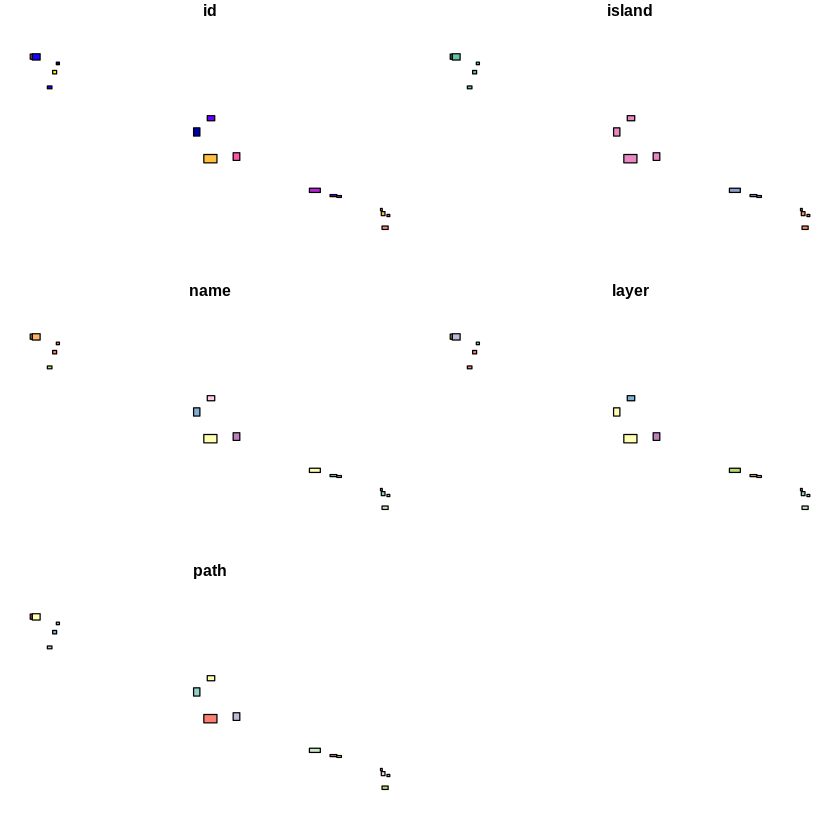

In [17]:
aoi_utm4
aoi_utm4 %>% plot

In [ ]:
# nlcd_utm4 <- raster("/content/workingfolder/nlcd/utm4/nlcd_utm4.tif")

In [ ]:
# nlcd_utm5 <- raster("/content/workingfolder/nlcd/utm5/nlcd_utm5.tif")

In [18]:
nwi_utm4 <- st_read("/content/workingfolder/nwi_utm4/nwi_utm4.gpkg")
nwi_utm4

Reading layer `nwi_utm4_numeric' from data source 
  `/content/workingfolder/nwi_utm4/nwi_utm4.gpkg' using driver `GPKG'
Simple feature collection with 10866 features and 8 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 412977.7 ymin: 2263072 xmax: 820600.7 ymax: 2464465
Projected CRS: WGS 84 / UTM zone 4N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

objectid,attribute,acres,wetland_ty,st_areasha,st_perimet,value,wetland_ty_numeric,geom
<int>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<MULTIPOLYGON [m]>
65,E1UBL,0.57719824,Estuarine and Marine Deepwater,2335.83841,235.37673,1,1,MULTIPOLYGON (((601338.6 23...
66,E1UBL,0.09291047,Estuarine and Marine Deepwater,375.99535,94.25132,1,1,MULTIPOLYGON (((601275.1 23...
67,E1UBL,0.21359442,Estuarine and Marine Deepwater,864.38594,158.10603,1,1,MULTIPOLYGON (((601233.2 23...
68,E1UBL,0.94985295,Estuarine and Marine Deepwater,3843.91853,546.20280,1,1,MULTIPOLYGON (((601315 2362...
69,E2EM1N,0.70531529,Estuarine and Marine Wetland,2854.30971,322.27311,4,4,MULTIPOLYGON (((601279.9 23...
70,E2USNx,0.52518745,Estuarine and Marine Wetland,2125.35822,236.82586,4,4,MULTIPOLYGON (((594710.2 23...
71,M2RS/ABN,0.00968637,Estuarine and Marine Wetland,39.19933,23.93514,4,4,MULTIPOLYGON (((595947 2355...
72,M2RS/ABN,0.17674767,Estuarine and Marine Wetland,715.27246,131.52469,4,4,MULTIPOLYGON (((595968.8 23...
73,M2RS/ABN,0.27420158,Estuarine and Marine Wetland,1109.65444,228.71957,4,4,MULTIPOLYGON (((595754.1 23...


In [19]:
# https://drive.google.com/file/d/1WYEPTwThsInCoHvsiI6eUg5j7fFIqYPT/view?usp=drive_link
drive_download(file = as_id('1WYEPTwThsInCoHvsiI6eUg5j7fFIqYPT'), path =  '/content/workingfolder/nwi_utm4/nwi_utm4_mask.gpkg', overwrite = FALSE)

File downloaded:

• wetland_mask.gpkg <id: 1WYEPTwThsInCoHvsiI6eUg5j7fFIqYPT>

Saved locally as:

• /content/workingfolder/nwi_utm4/nwi_utm4_mask.gpkg



In [21]:
nwi_utm4_mask <- st_read("/content/workingfolder/nwi_utm4/nwi_utm4_mask.gpkg")
nwi_utm4_mask

nwi_utm4_mask <- nwi_utm4_mask %>%
  mutate(value = as.numeric(value))

# Check the structure to confirm the change
str(nwi_utm4_mask)

Reading layer `mask' from data source 
  `/content/workingfolder/nwi_utm4/nwi_utm4_mask.gpkg' using driver `GPKG'
Simple feature collection with 649 features and 4 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 590673.9 ymin: 2364094 xmax: 632113.6 ymax: 2400804
Projected CRS: WGS 84 / UTM zone 4N


ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

layer,wetland_ty,value,Name,geom
<chr>,<chr>,<int>,<chr>,<MULTIPOLYGON [m]>
Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((591961.3 23...
Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((592268 2386...
Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((593176.9 23...
Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((594438.1 23...
Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((591832.3 23...
Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((591794.3 23...
Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((591839.9 23...
Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((591870.4 23...
Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((591787.5 23...


Classes ‘sf’ and 'data.frame':	649 obs. of  5 variables:
 $ layer     : chr  "Haleiwa" "Haleiwa" "Haleiwa" "Haleiwa" ...
 $ wetland_ty: chr  "emergent wetland" "emergent wetland" "emergent wetland" "emergent wetland" ...
 $ value     : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Name      : chr  "Haleiwa" "Haleiwa" "Haleiwa" "Haleiwa" ...
 $ geom      :sfc_MULTIPOLYGON of length 649; first list element: List of 1
  ..$ :List of 1
  .. ..$ : num [1:18, 1:2] 591961 591961 591960 591959 591961 ...
  ..- attr(*, "class")= chr [1:3] "XY" "MULTIPOLYGON" "sfg"
 - attr(*, "sf_column")= chr "geom"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA NA NA NA
  ..- attr(*, "names")= chr [1:4] "layer" "wetland_ty" "value" "Name"


In [32]:
nwi_utm4 <- nwi_utm4_mask
nwi_utm4

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

,layer,wetland_ty,value,Name,geom
,<chr>,<chr>,<dbl>,<chr>,<MULTIPOLYGON [m]>
1,Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((591961.3 23...
2,Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((592268 2386...
3,Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((593176.9 23...
4,Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((594438.1 23...
5,Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((591832.3 23...
6,Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((591794.3 23...
7,Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((591839.9 23...
8,Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((591870.4 23...
9,Haleiwa,emergent wetland,2,Haleiwa,MULTIPOLYGON (((591787.5 23...


In [71]:
nrow(nwi_utm4)

[1] 649

In [ ]:
# st_write(nwi_utm4, paste0("/content/sample_data/nwi_utm4.gpkg"))

Writing layer `nwi_utm4' to data source 
  `/content/sample_data/nwi_utm4.gpkg' using driver `GPKG'
Writing 10866 features with 8 fields and geometry type Multi Polygon.


In [22]:
# nwi_utm5 <- st_read("/content/workingfolder/nwi_utm5/nwi_utm5.gpkg")
# nwi_utm5

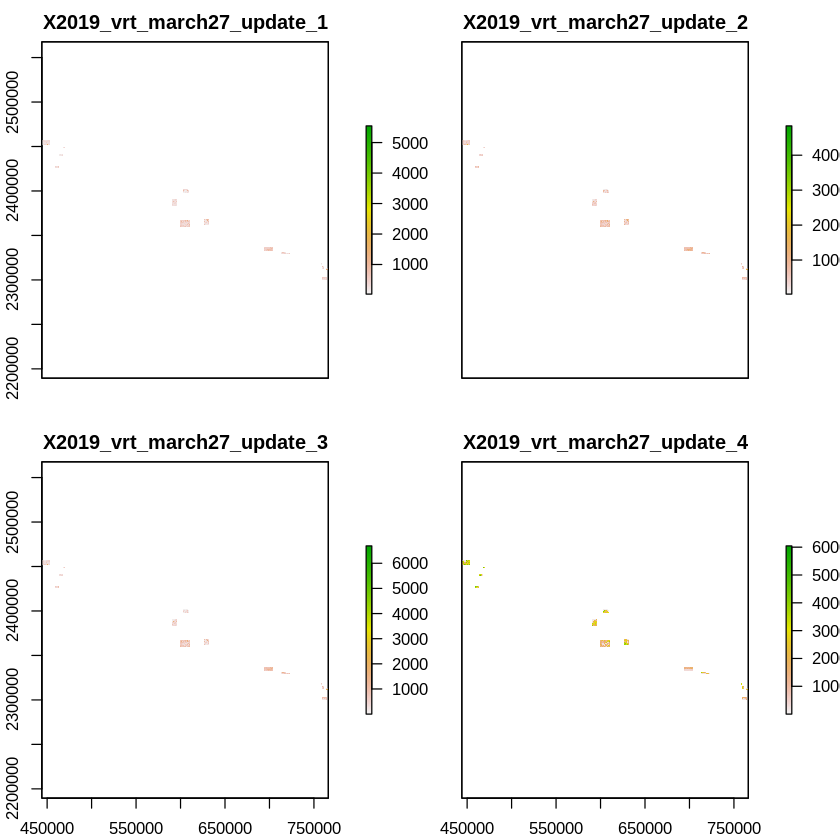

In [69]:
vrt_utm4_2018 <- stack("/content/imagery/planet/2018/utm4/2018_vrt_march27_update.vrt")
# vrt_utm4_2018 %>% plot
vrt_utm4_2019 <- stack("/content/imagery/planet/2019/utm4/2019_vrt_march27_update.vrt")
vrt_utm4_2019 %>% plot
vrt_utm4_2020 <- stack("/content/imagery/planet/2020/utm4/2020_vrt_march27_update.vrt")
# vrt_utm4_2020 %>% plot

In [24]:
# vrt_utm5_2018 <- stack("/content/imagery/planet/2018/utm5/2018_select_hawaii_vrt.vrt")
# vrt_utm5_2018 %>% plot

In [25]:
unified_data_table <- data.table (unified = c(1, 2, 3, 4, 5, 6, 7))
nwi_data_table <- data.table (nwi = list(1, 2, 3, 4, 5, 6, -1))
nlcd_data_table <- data.table(nlcd = list(-1, -1, -1, -1, -1, -1, c(11, 90, 95, 21, 22, 23, 24, 81,82, 71, 31, 41,42,43, 52)))
ccap_labels_data_table <- data.table(ccap = list(-1, -1, -1, -1, -1, -1, c(0,1, 19, 21, 16,17,18, 13,15, 14, 22, 23, 2, 3, 4, 5, 6,7, 8, 20, 9, 10, 11, 12)))

unified_data_table_all <- data.table (
  unified_data_table,
  nwi_data_table,
  nlcd_data_table,
  ccap_labels_data_table)

In [72]:
nrow(unified_data_table_all)

[1] 7

In [ ]:
# unified_data_table <- data.table (unified = c(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))
# nwi_data_table <- data.table (nwi = list(-1, c(1,2,3), 4, 5, 6, 7, -1, -1, -1, -1, -1, -1))
# nlcd_data_table <- data.table(nlcd = list(-1, 11, 90, 95, -1, -1, c(21,22,23,24), c(81,82), 71, 31, c(41,42,43), 52))
# ccap_labels_data_table <- data.table(ccap = list(c(0,1), c(19,21), c(16,17,18), c(13,15), 14, c(22,23), c(2,3,4,5), c(6,7), 8, 20, c(9,10,11), 12))

# unified_data_table_all <- data.table (
#   unified_data_table,
#   nwi_data_table,
#   nlcd_data_table,
#   ccap_labels_data_table)

In [27]:
ccap_path =c('/content/workingfolder/ccap/utm4/kauai_ccap_2010.tif',
'/content/workingfolder/ccap/utm4/oahu_ccap_2010.tif',
'/content/workingfolder/ccap/utm4/molokai_ccap_2010.tif',
'/content/workingfolder/ccap/utm4/maui_ccap_2010.tif')
ccap_path_data_table <- data.table (ccap_path)

island = c('kauai','oahu','molokai','maui')
island_data_table <- data.table (island)

dem_path =c('/content/workingfolder/dem/utm4/wgs84_kauai_10m.tif',
'/content/workingfolder/dem/utm4/wgs84_oahu_dem.tif',
'/content/workingfolder/dem/utm4/wgs84_molokai_dem.tif',
'/content/workingfolder/dem/utm4/wgs84_maui_dem.tif')
dem_path_data_table <- data.table (dem_path)

linked_dt <- data.table (
  island_data_table,
  ccap_path_data_table,
  dem_path_data_table)

linked_dt$ccap_raster <- linked_dt$ccap_path %>% lapply(stack)
linked_dt$dem_raster <- linked_dt$dem_path %>% lapply(stack)

In [28]:
linked_dt

island,ccap_path,dem_path,ccap_raster,dem_raster
<chr>,<chr>,<chr>,<list>,<list>
kauai,/content/workingfolder/ccap/utm4/kauai_ccap_2010.tif,/content/workingfolder/dem/utm4/wgs84_kauai_10m.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
oahu,/content/workingfolder/ccap/utm4/oahu_ccap_2010.tif,/content/workingfolder/dem/utm4/wgs84_oahu_dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
molokai,/content/workingfolder/ccap/utm4/molokai_ccap_2010.tif,/content/workingfolder/dem/utm4/wgs84_molokai_dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>
maui,/content/workingfolder/ccap/utm4/maui_ccap_2010.tif,/content/workingfolder/dem/utm4/wgs84_maui_dem.tif,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>,<S4 class ‘RasterStack’ [package “raster”] with 12 slots>


In [ ]:
# ccap_path =c('/content/workingfolder/ccap/utm5/hawaii_ccap_2010_01.tif',
# '/content/workingfolder/ccap/utm5/hawaii_ccap_2010_02.tif',
# '/content/workingfolder/ccap/utm5/hawaii_ccap_2010_03.tif')
# ccap_path_data_table <- data.table (ccap_path)


# island = c('hawaii')
# island_data_table <- data.table (island)

# dem_path =c('/content/workingfolder/dem/utm5/wgs84_hawaii_dem.tif',
# '/content/workingfolder/dem/utm5/wgs84_hawaii_dem.tif',
# '/content/workingfolder/dem/utm5/wgs84_hawaii_dem.tif')
# dem_path_data_table <- data.table (dem_path)

# linked_dt <- data.table (
#   island_data_table,
#   ccap_path_data_table,
#   dem_path_data_table)

# linked_dt$ccap_raster <- linked_dt$ccap_path %>% lapply(stack)
# linked_dt$dem_raster <- linked_dt$dem_path %>% lapply(stack)

In [ ]:
# # new linked data table with updated elevation model for hawaii island.

# ccap_pathh =c('/content/workingfolder/ccap/utm5/hawaii_ccap_2010_01.tif',
# '/content/workingfolder/ccap/utm5/hawaii_ccap_2010_02.tif',
# '/content/workingfolder/ccap/utm5/hawaii_ccap_2010_03.tif')
# ccap_path_data_tablee <- data.table (ccap_pathh)


# island = c('hawaii')
# island_data_tablee <- data.table (island)

# dem_pathh =c('/content/folder/new_elevation/hi_dem_projected.tif')
# dem_path_data_tablee <- data.table (dem_pathh)

# linked_dtt <- data.table (
#   island_data_tablee,
#   ccap_path_data_tablee,
#   dem_path_data_tablee)

# linked_dtt$ccap_raster <- linked_dtt$ccap_pathh %>% lapply(stack)
# linked_dtt$dem_raster <- linked_dtt$dem_pathh %>% lapply(stack)

In [ ]:
# linked_dtt

In [ ]:
# hi_dem <- raster("/content/folder/new_elevation/hi_dem_projected.tif")

In [ ]:
# hi_dem %>% st_crs

In [ ]:
# cl <- makeCluster(10)

# # Define the target CRS (EPSG:26905)
# target_crs <- CRS("+init=epsg:26905")

# # Project the raster to the target CRS
# hi_dem_projected <- projectRaster(hi_dem, crs = target_crs)

# # Save the projected raster as a new GeoTIFF file
# writeRaster(hi_dem_projected, filename = "/content/folder/new_elevation/hi_dem_projected.tif", format = "GTiff")

# stopCluster(cl)

In [ ]:
# #  Planet grid at 128 x 128 pixels UTM 4 \
# # for 128 METERS wide tile and each pixel is 3m = (128/3) = (42.6,42.6) cell size 43,43 but the grid needs to be 128,128

# planet_fishnet_128 <-
#   1:nrow(aoi_utm4) %>% lapply(function(x){
#     fishnet <- st_make_grid(aoi_utm4[x,], cellsize = c(128,128)) %>% st_as_sf %>% data.table
#     fishnet$id <-1:length(fishnet)
#     fishnet_int <- fishnet %>%
#       st_as_sf() %>%
#         st_intersection(aoi_utm4[x,]) %>%
#           st_transform(st_crs(26904)) %>%
#             data.table()
#     fishnet <- fishnet[fishnet$id %in% fishnet_int$id ]

#     fishnet$island <- aoi_utm4$island[x]
#     fishnet$layer <- aoi_utm4$layer[x]



#     return(fishnet)
#     # print(fishnet)
#     # print(class(fishnet))
#     # print(st_crs(fishnet))
#     # plot(fishnet)

#   }) %>% rbindlist()

# planet_fishnet_128_sf <- st_as_sf(planet_fishnet_128)
# class(planet_fishnet_128_sf)
# st_crs(planet_fishnet_128_sf)

# planet_fishnet_128_sf_transformed <- st_transform(planet_fishnet_128_sf, crs = 26904)

# st_crs(planet_fishnet_128_sf_transformed)


# # st_write(planet_fishnet_128_sf_transformed, "/content/sample_data/fishnet_128_sf_utm4.gpkg", append=TRUE)

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant through

[1] "sf"         "data.table" "data.frame"

Coordinate Reference System:
  User input: WGS 84 / UTM zone 4N 
  wkt:
PROJCRS["WGS 84 / UTM zone 4N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT

Coordinate Reference System:
  User input: EPSG:26904 
  wkt:
PROJCRS["NAD83 / UTM zone 4N",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-159,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,

In [29]:
#  Planet grid at 128 x 128 pixels UTM 4  = 384 x 384 meters


planet_fishnet_384 <-
  1:nrow(aoi_utm4) %>% lapply(function(x){
    fishnet <- st_make_grid(aoi_utm4[x,], cellsize = c(384,384)) %>% st_as_sf %>% data.table
    fishnet$id <-1:length(fishnet)
    fishnet_int <- fishnet %>%
      st_as_sf() %>%
        st_intersection(aoi_utm4[x,]) %>%
          st_transform(st_crs(26904)) %>%
            data.table()
    fishnet <- fishnet[fishnet$id %in% fishnet_int$id ]

    fishnet$island <- aoi_utm4$island[x]
    fishnet$layer <- aoi_utm4$layer[x]



    return(fishnet)
    # print(fishnet)
    # print(class(fishnet))
    # print(st_crs(fishnet))
    # plot(fishnet)

  }) %>% rbindlist()

planet_fishnet_384_sf <- st_as_sf(planet_fishnet_384)
class(planet_fishnet_384_sf)
st_crs(planet_fishnet_384_sf)

planet_fishnet_384_sf_transformed <- st_transform(planet_fishnet_384_sf, crs = 26904)

st_crs(planet_fishnet_384_sf_transformed)

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”
Warning message:
“attribute variables are assumed to be spatially constant through

[1] "sf"         "data.table" "data.frame"

Coordinate Reference System:
  User input: WGS 84 / UTM zone 4N 
  wkt:
PROJCRS["WGS 84 / UTM zone 4N",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT

Coordinate Reference System:
  User input: EPSG:26904 
  wkt:
PROJCRS["NAD83 / UTM zone 4N",
    BASEGEOGCRS["NAD83",
        DATUM["North American Datum 1983",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4269]],
    CONVERSION["UTM zone 4N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-159,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,

In [73]:
nrow(planet_fishnet_384_sf_transformed)

[1] 2666

In [30]:
st_write(planet_fishnet_384_sf_transformed, "/content/sample_data/original-fn.gpkg", append=TRUE)

Updating layer `original-fn' to data source `/content/sample_data/original-fn.gpkg' using driver `GPKG'
Writing 2666 features with 3 fields and geometry type Polygon.


In [ ]:
# #  Planet grid at 128 x 128 pixels
# planet_fishnet_384 <-
#   1:nrow(aoi_utm5) %>% lapply(function(x){
#     fishnet <- st_make_grid(aoi_utm5[x,], cellsize = c(384,384)) %>% st_as_sf %>% data.table
#     fishnet$id <-1:length(fishnet)
#     fishnet_int <- fishnet %>%
#       st_as_sf() %>%
#         st_intersection(aoi_utm5[x,]) %>%
#           st_transform(st_crs(26905)) %>%
#             data.table()
#     fishnet <- fishnet[fishnet$id %in% fishnet_int$id ]

#     fishnet$island <- aoi_utm5$island[x]
#     fishnet$layer <- aoi_utm5$layer[x]



#     return(fishnet)
#     # print(fishnet)
#     # print(class(fishnet))
#     # print(st_crs(fishnet))
#     # plot(fishnet)

#   }) %>% rbindlist()

# planet_fishnet_384_sf <- st_as_sf(planet_fishnet_384)
# class(planet_fishnet_384_sf)
# st_crs(planet_fishnet_384_sf)

# planet_fishnet_384_sf_transformed <- st_transform(planet_fishnet_384_sf, crs = 26905)

# st_crs(planet_fishnet_384_sf_transformed)


# st_write(planet_fishnet_384_sf_transformed, "/content/sample_data/fishnet_384_sf_utm5.gpkg", append=TRUE)

In [46]:
dir.create("/content/exports")
# dir.create("/content/exports/image")
# dir.create("/content/exports/dem")
# dir.create("/content/exports/ccap_filled")

# dir.create("/content/exports/nwi_nlcd_filled")

Warning message in dir.create("/content/exports"):
“'/content/exports' already exists”
Warning message in dir.create("/content/exports/nwi_ccap_filled"):
“'/content/exports/nwi_ccap_filled' already exists”


In [66]:
dir.create("/content/exports/export")

In [76]:
################ UTM 5 for hawaii.

cl <- makeCluster(10)

library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)
library(dplyr)




# haleiwa <- c(96:97, 111:113, 126:127, 140:143, 154:160, 169:174, 185:190, 203:205, 208:209,
# 219:223, 234:236, 250:252, 265:268, 280:283, 288, 298, 301:303, 314:316, 329:331) %>% lapply(function(u){
# haleiwa <- c(140,141,154,155,156,169,170,171) %>% lapply(function(u){

# kahuku <- c(722:723, 725, 740:744, 757:763, 768:769, 774:781, 785:787, 789:798, 804:813,
# 815, 821, 823:831, 840:845, 847:849, 860:866, 879:880, 882) %>% lapply(function(u){

# kawainui <- c(1465:1466, 1472, 1481:1483, 1488:1491, 1497:1499, 1504:1507, 1513:1517,
# 1520:1521, 1523, 1529:1539, 1545:1551, 1554:1555, 1561:1565, 1571, 1577:1581, 1593:1596,
# 1610:1612, 1628:1629, 1645)%>% lapply(function(u){

# placeholder <- c(1530) %>% lapply(function(u){


# kahuku <- c(722:723, 725, 740:744, 757:763, 768:769, 774:781, 785:787, 789:798, 804:813,
# 815, 821, 823:831, 840:845, 847:849, 860:866, 879:880, 882) %>% lapply(function(u){
# kahuku <- c(762:763, 768:769, 774:781, 785:787, 789:798, 804:813,
# 815, 821, 823:831, 840:845, 847:849, 860:866, 879:880, 882) %>% lapply(function(u){
# kahuku <- c(862:866, 879:880, 882) %>% lapply(function(u){





# kawainui <- c(1465:1466, 1472, 1481:1483, 1488:1491, 1497:1499, 1504:1507, 1513:1517,
# 1520:1521, 1523, 1529:1539, 1545:1551, 1554:1555, 1561:1565, 1571, 1577:1581, 1593:1596,
# 1610:1612, 1628:1629, 1645)%>% lapply(function(u){

export <- c(862) %>% lapply(function(u){

test <- planet_fishnet_384_sf_transformed[u,] %>% crop(vrt_utm4_2019,.)
test_extent <-extent(test)
test_extent_raster <- raster(nrow=384, ncol=384, ext=test_extent, crs=crs(26904)) # nrow=384, ncol=384 is necessary to ensure the width and height are correct!
test_extent_raster_size <- crop(resample(test, test_extent_raster, method = "ngb"), extent(test_extent_raster)) # this is the planet tiles!
crs(test_extent_raster_size) <- CRS("+init=epsg:26904")


# test_nwi_crop <- nwi_utm4 %>% st_intersection(planet_fishnet_384_sf_transformed[u,] %>% st_transform(st_crs(nwi_utm4))) %>%
#   st_transform(st_crs(26904)) %>% fasterize(.,test_extent_raster_size[[1]], "value") #wetland_ty_numeric

test_nwi_crop <- nwi_utm4 %>% st_intersection(planet_fishnet_384_sf_transformed[u,] %>% st_transform(st_crs(nwi_utm4))) %>%
  fasterize(.,test_extent_raster_size[[1]], "value") #wetland_ty_numeric



# test_nlcd_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>% crop(nlcd_utm4,.) %>%
#   resample(test_extent_raster_size, method = "ngb")

test_dem_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>%
  crop(linked_dt[island ==planet_fishnet_384_sf_transformed[u,]$island]$dem_raster[[1]],.) %>% resample(test_extent_raster_size, method= "ngb")

test_ccap_crop <- planet_fishnet_384_sf_transformed[u,] %>% st_buffer(100) %>% st_transform(st_crs(26904)) %>%
  crop(linked_dt[island ==planet_fishnet_384_sf_transformed[u,]$island]$ccap_raster[[1]],.) %>% resample(test_extent_raster_size, method = "ngb")

nwi_harm <- test_nwi_crop
# nlcd_harm <- test_nlcd_crop
ccap_harm <- test_ccap_crop
values(nwi_harm) <- -1
# values(nlcd_harm) <- -1
values(ccap_harm) <- -1
for(i in 1:nrow(unified_data_table_all)){
 values(nwi_harm)[ values(test_nwi_crop %in% unified_data_table_all$nwi[[i]])] <- unified_data_table_all$unified[[i]]
#  values(nlcd_harm)[ values(test_nlcd_crop %in% unified_data_table_all$nlcd[[i]])] <- unified_data_table_all$unified[[i]]
 values(ccap_harm)[ values(test_ccap_crop %in% unified_data_table_all$ccap[[i]])] <- unified_data_table_all$unified[[i]]
}
# nwi_nlcd_filled <- nlcd_harm
# values(nwi_nlcd_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
# values(nwi_nlcd_filled)[values(nwi_nlcd_filled) ==-1] <- 12
# ccap_filled <- ccap_harm
# values(ccap_filled)[values(ccap_harm) !=-1] <- values(ccap_harm)[values(ccap_harm) !=-1]
# values(ccap_filled)[values(ccap_filled) ==-1] <- 12



# nwi_ccap_filled <- ccap_harm
# values(nwi_ccap_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
# values(nwi_ccap_filled)[values(nwi_ccap_filled) ==-1] <- 12

# nwi_ccap_filled <- ccap_harm
# values(nwi_ccap_filled)[values(nwi_harm) !=-1] <- values(nwi_harm)[values(nwi_harm) !=-1]
# values(nwi_ccap_filled)[values(nwi_ccap_filled) ==-1] <- 12

nwi_ccap_filled <- ccap_harm
values(nwi_ccap_filled)[values(nwi_harm)!=-1] <- values(nwi_harm)[values(nwi_harm)!=-1]
values(nwi_ccap_filled)[values(nwi_ccap_filled) ==-1] <- 12


# test_extent_raster_size %>% writeRaster(paste0('/content/exports/image/', u,"_planet128",'.tif'),overwrite=T)
# test_dem_crop %>% writeRaster(paste0('/content/exports/dem/', u, "_dem128",'.tif'),overwrite=T)
# ccap_filled %>% writeRaster(paste0('/content/exports/ccap_filled/', u, "_ccap_filled",'.tif'),overwrite=T)
# nwi_nlcd_filled %>% writeRaster(paste0('/content/exports/nwi_nlcd_filled/', u, "_nwi_nlcd_filled",'.tif'),overwrite=T)
nwi_ccap_filled %>% writeRaster(paste0('/content/exports/export/', u, "_multi_wl",'.tif'),overwrite=T)

})

# zip(zipfile = "/content/kawainui_384.zip",
#     files = c("/content/exports/kawainui"))
# drive_upload(media = "/content/kawainui_384.zip", path = as_id("1S7oW0SDSJeuAeyCCg_HPhVsjFDcSQaEE"))
# # https://drive.google.com/drive/folders/1S7oW0SDSJeuAeyCCg_HPhVsjFDcSQaEE?usp=drive_link


stopCluster(cl)


Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


Local file:

• /content/haleiwa_384.zip

Uploaded into Drive file:

• haleiwa_384.zip <id: 1hPH4eVXhw0AsTU9KJ_Es5plNalACKVnd>

With MIME type:

• application/zip



In [ ]:
# print("test")

In [ ]:
# # zip the exports and save in utm5_updatedExports_march20 folder
# # images 2018

# zip(zipfile = "/content/utm4_2018_hanalei_nwi_ccap_filled.zip",
#     files = c("/content/exports/nwi_ccap_filled"))
# drive_upload(media = "/content/utm4_2018_hanalei_nwi_ccap_filled.zip", path = as_id("1SKIvRlGDANvbKTn9hirNAy3ykcdhfxiO"))

Local file:

• /content/utm4_2019_images_02.zip

Uploaded into Drive file:

• utm4_2019_images_02.zip <id: 16buC6PcTtupoeEKTazd72da3jFFcH0PJ>

With MIME type:

• application/zip



In [ ]:
dir.create("/content/unzip")
dir.create("/content/unzip/dem")
dir.create("/content/unzip/images")


In [ ]:
# https://drive.google.com/file/d/13-NIaBiZotWS3QgY5uvN6-N1MQH0rAqD/view?usp=drive_link
drive_download(file = as_id('13-NIaBiZotWS3QgY5uvN6-N1MQH0rAqD'), path =  '/content/unzip/dem/dem_07.zip', overwrite = FALSE)

unzip(zipfile ='/content/unzip/dem/dem_07.zip', exdir = "content/unzip/dem/dem_07/")

File downloaded:

• utm4_2018_dem_07.zip <id: 13-NIaBiZotWS3QgY5uvN6-N1MQH0rAqD>

Saved locally as:

• /content/unzip/dem/dem_07.zip



In [ ]:
# https://drive.google.com/file/d/1qtfU6rc7N3-SMIQIFy8WkBAQSJV1Ztaz/view?usp=drive_link
drive_download(file = as_id('1qtfU6rc7N3-SMIQIFy8WkBAQSJV1Ztaz'), path =  '/content/unzip/images/img_07.zip', overwrite = FALSE)

unzip(zipfile ='/content/unzip/images/img_07.zip', exdir = "/content/unzip/images/img_07/")

File downloaded:

• utm4_2018_images_07.zip <id: 1qtfU6rc7N3-SMIQIFy8WkBAQSJV1Ztaz>

Saved locally as:

• /content/unzip/images/img_07.zip



In [ ]:
# https://drive.google.com/file/d/1R4UaJHXcuf_3yDSSaqPJMgeYKLOPTHAI/view?usp=drive_link
drive_download(file = as_id('1R4UaJHXcuf_3yDSSaqPJMgeYKLOPTHAI'), path =  '/content/unzip/images/images_19_03.zip', overwrite = FALSE)

unzip(zipfile ='/content/unzip/images/images_19_03.zip', exdir = "content/unzip/images/images_19_03/")

File downloaded:

• utm4_2019_images_03.zip <id: 1R4UaJHXcuf_3yDSSaqPJMgeYKLOPTHAI>

Saved locally as:

• /content/unzip/images/images_19_03.zip



In [ ]:
dir.create("/content/images_19_03")

In [ ]:
unzip(zipfile ='/content/unzip/images/images_19_03.zip', exdir = "/content/images_19_03/")

In [ ]:
dir.create("/content/folder")
dir.create("/content/folder/images")
dir.create("/content/folder/images/2018")
dir.create("/content/folder/images/2019")
dir.create("/content/folder/images/2020")

dir.create("/content/folder/dem")
# dir.create("/content/folder/nwi_ccap")


In [ ]:
# put all 2018 images in the same folder
# put all the 2019 images in the same folder
# put all the dem in the same folder
# put all the nwi_ccap in the same folder

# Define the source and destination directories
# move dem
# source_dir <- "//content/2018_exports_hanalei/dem/content/exports/dem"
# destination_dir <- "/content/folder/dem"

# move niw_ccap
# source_dir <- "/content/2018_exports_G_1201_2666/nwi_ccap_filled"
# destination_dir <- "/content/folder/nwi_ccap"

# move 2018 images
# source_dir <- "/content/2018_exports_G_1201_2666/image"
# destination_dir <- "/content/folder/images/2018"

# move 2019 images
source_dir <- "/content/images_19_03/content/exports/image"
destination_dir <- "/content/folder/images/2019"

# List all .tif files in the source directory
tif_files <- list.files(source_dir, pattern = "\\.tif$", full.names = TRUE)

# Move each .tif file to the destination directory
for (file in tif_files) {
  # Extract the file name
  file_name <- basename(file)

  # Define the destination file path
  destination_file <- file.path(destination_dir, file_name)

  # Copy the file to the destination directory
  file.copy(file, destination_file)

  # Remove the original file
  file.remove(file)
}


# Stacking data

In [ ]:
dir.create("/content/folder_stack")
# dir.create("/content/folder_stack/OneYear")
# dir.create("/content/folder_stack/TwoYears")
dir.create("/content/folder_stack/ThreeYears")


In [ ]:
# time to stack 2018 images and dem
cl <- makeCluster(12)

library(raster)

# Function to stack rasters based on the common identifier and save them
stack_and_save_rasters <- function(base_folder, output_folder, identifier) {
  # Define the paths for each year and the DEM folder
  years <- c("2018", "2019", "2020") #
  dem_folder <- "dem"

  # Generate file paths for the same identifier across years and DEM
  file_paths <- c()
  for (year in years) {
    file_paths <- c(file_paths, file.path(base_folder, "images", year, paste0(identifier, "_planet.tif"))) # "utm5",
  }
  file_paths <- c(file_paths, file.path(base_folder, dem_folder, paste0(identifier, "_dem.tif"))) # "utm5",

  # Check if all files exist before proceeding
  if (all(file.exists(file_paths))) {
    # Stack the rasters
    raster_stack <- stack(file_paths)

    # Define the output path
    output_file_path <- file.path(output_folder, paste0(identifier, "_stacked.tif"))

    # Save the stacked raster
    writeRaster(raster_stack, filename = output_file_path, format = "GTiff", overwrite=TRUE)

    cat("Successfully saved:", output_file_path, "\n")
  } else {
    cat("One or more files do not exist for identifier", identifier, "\n")
  }
}

# Example usage
base_folder <- "/content/folder"
output_folder <- "/content/folder_stack/ThreeYears"

# Create the output folder if it doesn't exist
if (!dir.exists(output_folder)) {
  dir.create(output_folder, recursive = TRUE)
}

# Assuming there are 229 .tif files numbered 1 to 229 in each year and the dem folder
for (identifier in 1812:1830) {
  stack_and_save_rasters(base_folder, output_folder, identifier)
}



stopCluster(cl)

Successfully saved: /content/folder_stack/ThreeYears/1812_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1813_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1814_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1815_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1816_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1817_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1818_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1819_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1820_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1821_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1822_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1823_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1824_stacked.tif 
Successfully saved: /content/folder_stack/ThreeYears/1825_stacked.tif 
Succes

In [ ]:
test_read <- raster("/content/folder_stack/ThreeYears/1815_stacked.tif")
test_read

class      : RasterLayer 
band       : 1  (of  13  bands)
dimensions : 384, 384, 147456  (nrow, ncol, ncell)
resolution : 1, 1  (x, y)
extent     : 445197, 445581, 2455491, 2455875  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
source     : 1815_stacked.tif 
names      : X1815_stacked_1 
values     : 9, 476  (min, max)


In [ ]:
# test2_read <- raster("/content/stack/TwoYears/13_stacked.tif")
# test2_read

In [ ]:
# Define the directory path
directory_path <- "/content/folder_stack/ThreeYears"

# List all files in the directory
files <- list.files(directory_path)

# Count the number of files
num_files <- length(files)

# Print the number of files
print(num_files)

[1] 19


In [ ]:
# zip(zipfile = "/content/utm4_OneYear_stacked.zip",
#     files = c("/content/folder_stack/OneYear"))
# drive_upload(media = "/content/utm4_OneYear_stacked.zip", path = as_id("1SKIvRlGDANvbKTn9hirNAy3ykcdhfxiO"))
# # https://drive.google.com/drive/folders/1SKIvRlGDANvbKTn9hirNAy3ykcdhfxiO?usp=drive_link

zip(zipfile = "/content/ThreeYear_Lumahai_stacked.zip",
    files = c("/content/folder_stack/ThreeYears"))
drive_upload(media = "/content/ThreeYear_Lumahai_stacked.zip", path = as_id("1SKIvRlGDANvbKTn9hirNAy3ykcdhfxiO"))
# https://drive.google.com/drive/folders/1SKIvRlGDANvbKTn9hirNAy3ykcdhfxiO?usp=drive_link

Local file:

• /content/ThreeYear_Lumahai_stacked.zip

Uploaded into Drive file:

• ThreeYear_Lumahai_stacked.zip <id: 1ZG1Fd3PEiQnxNRbXeyVOR58WaODzpTg6>

With MIME type:

• application/zip



In [ ]:
# # Define the directory path
# directory_path <- "/content/folder_stack/TwoYears"

# # List all files in the directory
# files <- list.files(directory_path, full.names = TRUE, recursive = FALSE)

# # Sort the file names alphabetically
# sorted_files <- sort(files)

# # Print the sorted list of files
# print(sorted_files)



# # # List all files in the directory
# # files <- list.files(directory_path, full.names = TRUE)

# # # Extract numeric parts from file names
# # numeric_parts <- as.integer(gsub("[^0-9]", "", files))

# # # Sort numeric parts and get indices
# # sorted_indices <- order(numeric_parts)

# # # Reorder file names based on sorted indices
# # sorted_files <- files[sorted_indices]

# # # Print the sorted list of files
# # print(sorted_files)

   [1] "/content/folder_stack/TwoYears/1000_stacked.tif"
   [2] "/content/folder_stack/TwoYears/1001_stacked.tif"
   [3] "/content/folder_stack/TwoYears/1002_stacked.tif"
   [4] "/content/folder_stack/TwoYears/1003_stacked.tif"
   [5] "/content/folder_stack/TwoYears/1004_stacked.tif"
   [6] "/content/folder_stack/TwoYears/1005_stacked.tif"
   [7] "/content/folder_stack/TwoYears/1006_stacked.tif"
   [8] "/content/folder_stack/TwoYears/1007_stacked.tif"
   [9] "/content/folder_stack/TwoYears/1008_stacked.tif"
  [10] "/content/folder_stack/TwoYears/1009_stacked.tif"
  [11] "/content/folder_stack/TwoYears/1010_stacked.tif"
  [12] "/content/folder_stack/TwoYears/1011_stacked.tif"
  [13] "/content/folder_stack/TwoYears/1012_stacked.tif"
  [14] "/content/folder_stack/TwoYears/1013_stacked.tif"
  [15] "/content/folder_stack/TwoYears/1014_stacked.tif"
  [16] "/content/folder_stack/TwoYears/1015_stacked.tif"
  [17] "/content/folder_stack/TwoYears/1016_stacked.tif"
  [18] "/content/folder_stack/T